<a href="https://colab.research.google.com/github/dasmiq/idi-cites/blob/main/idi_cites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citations of Perseus Greek and Latin texts in IDI books

This notebook merges the passim output with Perseus and Harvard metadata and gives some example plots.

We start by loading some tidyverse libraries.

In [1]:
suppressPackageStartupMessages({
  library(dplyr)
  library(ggplot2)
  library(stringr)
})

First, we load information on titles and groups (i.e., usually authors) of CTS works.

In [2]:
works <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/works.csv", header=TRUE)

We load word counts of the editions (i.e., not translations) of CTS works.

In [3]:
work.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/work-words.csv", header=TRUE)

We load data that computes the longest common subsequence between a CTS works citable chunks and the passim alignment, weighted by the length of the aligned chunks. This serves as a proxy for whether an IDI contains an edition of (part of) a CTS work.

In [4]:
overlap <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/overlap.csv.gz")))),
  header=TRUE) |>
    mutate(wlcs=if_else(wlcs < lblcs, lblcs, wlcs)) |> mutate(wover=wlcs/tlen)

In [5]:
lab.over <- overlap |> mutate(urn=str_replace(edition, "\\.[^.]+$", "")) |> left_join(works, by="urn") |> select(-c("group"))

Considering books that cover at least 10% of a work's chunks in order, we can count the works with the most editions.

In [6]:
lab.over |> filter(wover >= 0.1) |> group_by(urn, author, title) |> count() |> ungroup() |>
  mutate(language=if_else(str_detect(urn, "greekLit"), "Greek", "Latin")) |>
  filter(language == "Greek") |>
  select(urn, author, title, n) |>
  arrange(-n) |> head(40)

urn,author,title,n
<chr>,<chr>,<chr>,<int>
urn:cts:greekLit:tlg0031.tlg006,New Testament,Epistle to the Romans,506
urn:cts:greekLit:tlg0031.tlg010,New Testament,Letter to the Ephesians,473
urn:cts:greekLit:tlg0031.tlg001,New Testament,Gospel according to Matthew,466
urn:cts:greekLit:tlg0031.tlg009,New Testament,Galatians,418
urn:cts:greekLit:tlg0031.tlg003,New Testament,Gospel according to Luke,411
urn:cts:greekLit:tlg0031.tlg004,New Testament,Gospel of John,405
urn:cts:greekLit:tlg0031.tlg019,New Testament,To the Hebrews,388
urn:cts:greekLit:tlg0031.tlg008,New Testament,2 Corinthians,383
urn:cts:greekLit:tlg0031.tlg002,New Testament,Gospel of Mark,376


We then download data on _all_ alignments, not just full editions, between CTS texts and IDI books. Since it's large, we first download the file and then load into R.

In [7]:
#cites <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")))),
#  header=TRUE)

system("wget https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/cites.csv.gz")

In [8]:
cites <- read.csv("cites.csv.gz", header=TRUE)

We now grab selected fields of book-level metadata on IDI books.

In [9]:
idi <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/idi-meta.csv.gz")))),
  header=TRUE)

In [10]:
count(idi)

n
<int>
983004


We join the full citation data with the data on editions. Any book that has contiguous coverage of at least 10% of a works citations is considered an edition.

In [11]:
ed.cites <- overlap |> filter(wover >= 0.1) |> mutate(work=str_replace(edition, "\\.[^.]+$", "")) |> group_by(work, book) |> summarize(eds=n(), .groups="drop") |>
  right_join(cites, by=c("work", "book"))

Check IDI books with weird dates.

In [12]:
idi |> filter(!str_detect(date1_src, "[0-9u][0-9u][0-9u][0-9u]") & date1_src != "")

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
32044014499081,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,90,91
32044058285594,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,92,98
32044018934927,Reports of the Immigration Commission.,United States.,1,,unknown code: 2,eng,eng,91,98
32044108123936,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,63,88
32044108123944,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,62,90
32044108123969,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,61,84
32044108123985,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,73,91
32044108123993,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,70,91
32044108124009,Die Bau- und Kunstdenkmäler von Westfalen.,,189,9999,Multiple dates,deu,deu,67,88


Note that at least two-thirds of the IDI books have at least one Greek or Latin quotation.

In [13]:
ed.cites |> filter(hits >= 1) |> select(book) |> distinct() |> count()

n
<int>
610462


Convert IDI's two string date fields into years and pick the lower one.

In [14]:
idi.dated <- idi |>
  mutate(year=suppressWarnings(as.integer(date1_src)), year2=suppressWarnings(as.integer(date2_src))) |>
  mutate(year=if_else(year2 < year & !is.na(year2) & year2 > 1400, year2, year))

Join all the citation data and metadata together into one dataframe.

In [15]:
meta.cites <- ed.cites |>
  mutate(is.edition=(!is.na(eds) & eds >= 1)) |> select(-eds) |>
  inner_join(works |> mutate(work=urn, work.label=paste(author, title, sep=", ")) |>
                      select(work, work.author=author, work.title=title, work.label), by="work") |>
  inner_join(work.words, by="work") |>
  inner_join(select(idi.dated, book, author, title, year, language=language_gen), by="book")


We're finally ready for the first example plot! Grab editions of Thucydides and plot a histogram of the books' publication dates. The IDI corpus doesn't link multivolume works, e.g., in 1759.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


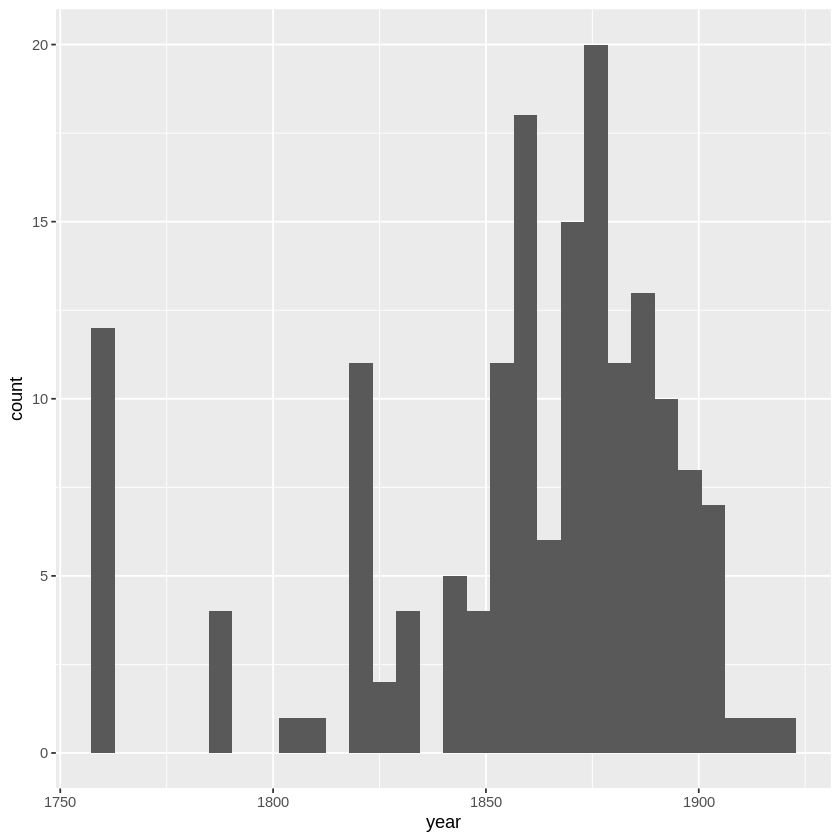

In [16]:
thuc.eds <- meta.cites |> filter(is.edition & work == "urn:cts:greekLit:tlg0003.tlg001")

ggplot(thuc.eds, aes(year)) + geom_histogram()

List the full data for those Thucydides editions.

In [17]:
thuc.eds |> mutate(book=tolower(book)) |> arrange(year)

work,book,hits,is.edition,work.author,work.title,work.label,words,author,title,year,language
<chr>,<chr>,<int>,<lgl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
urn:cts:greekLit:tlg0003.tlg001,hn5xhj,541,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhk,529,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhm,556,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhp,767,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5xhq,614,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6h,613,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6i,618,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6j,711,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell
urn:cts:greekLit:tlg0003.tlg001,hn5z6k,525,TRUE,Thucydides,History of the Peloponnesian War,"Thucydides, History of the Peloponnesian War",150139,Thucydides.,Bellum Peloponnesiacum,1759,ell


Plot histograms for editions of Thucydides, Herodotus, and Homer.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


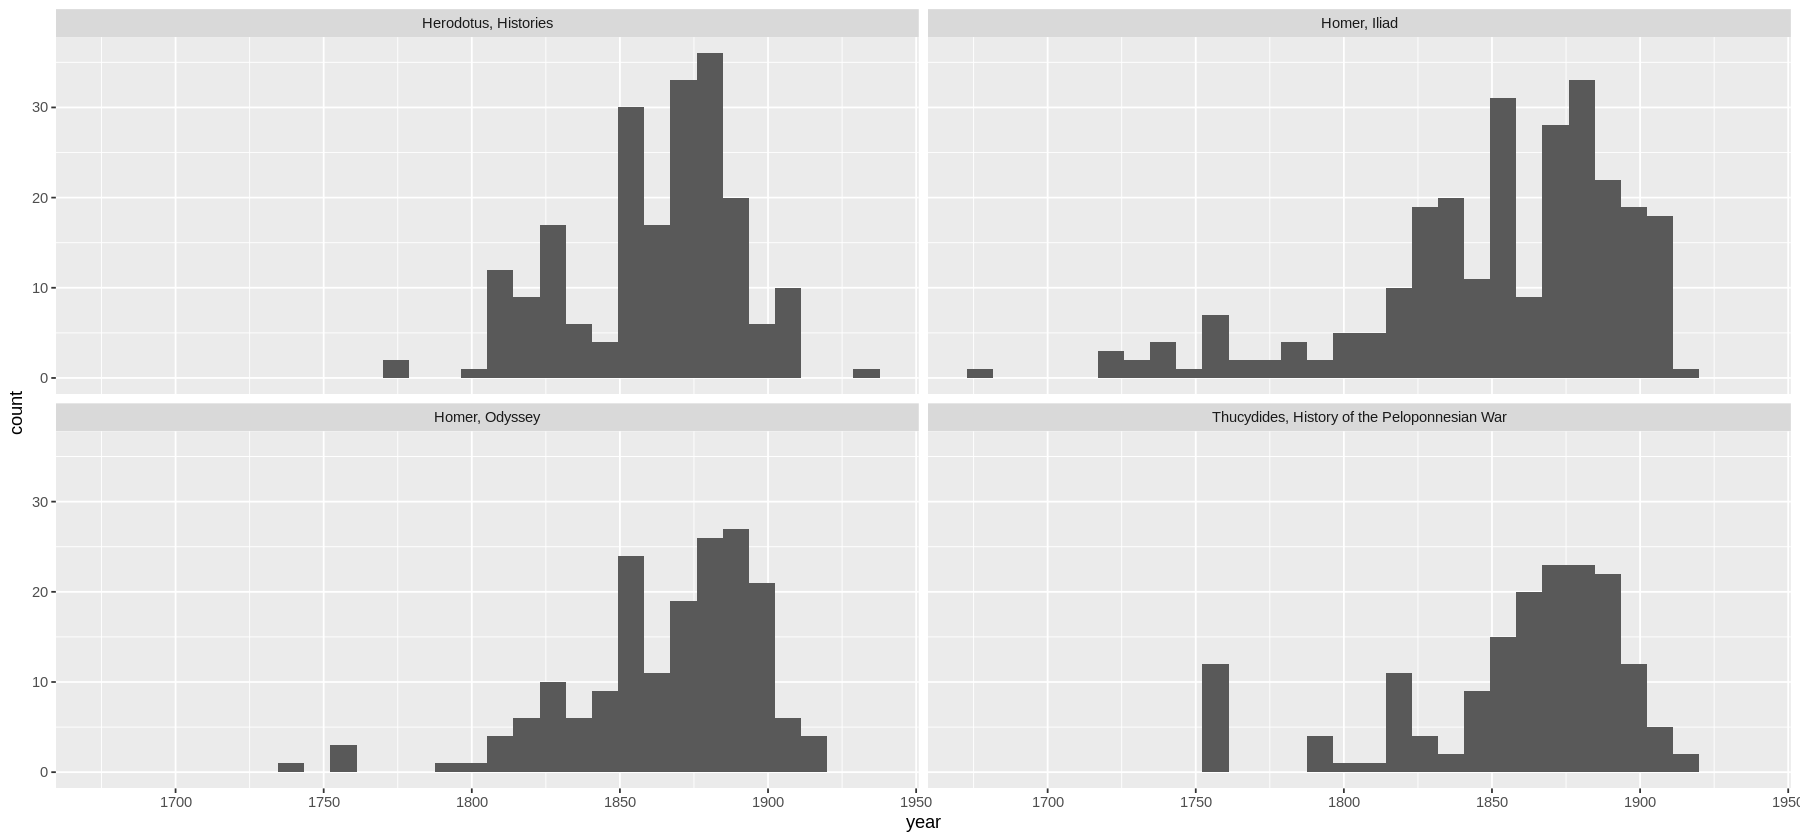

In [18]:
options(repr.plot.width=15)
meta.cites |> filter(is.edition & str_detect(work, "tlg(0003|0016|0012)\\.tlg00[12]")) |>
  ggplot(aes(year)) + geom_histogram() + facet_wrap(vars(work.label))

We now look at the citations of those four works _not_ in books that are editions of those works. They all seem to peak in the later 19c, except for Herodotus, which peaks around 1840.

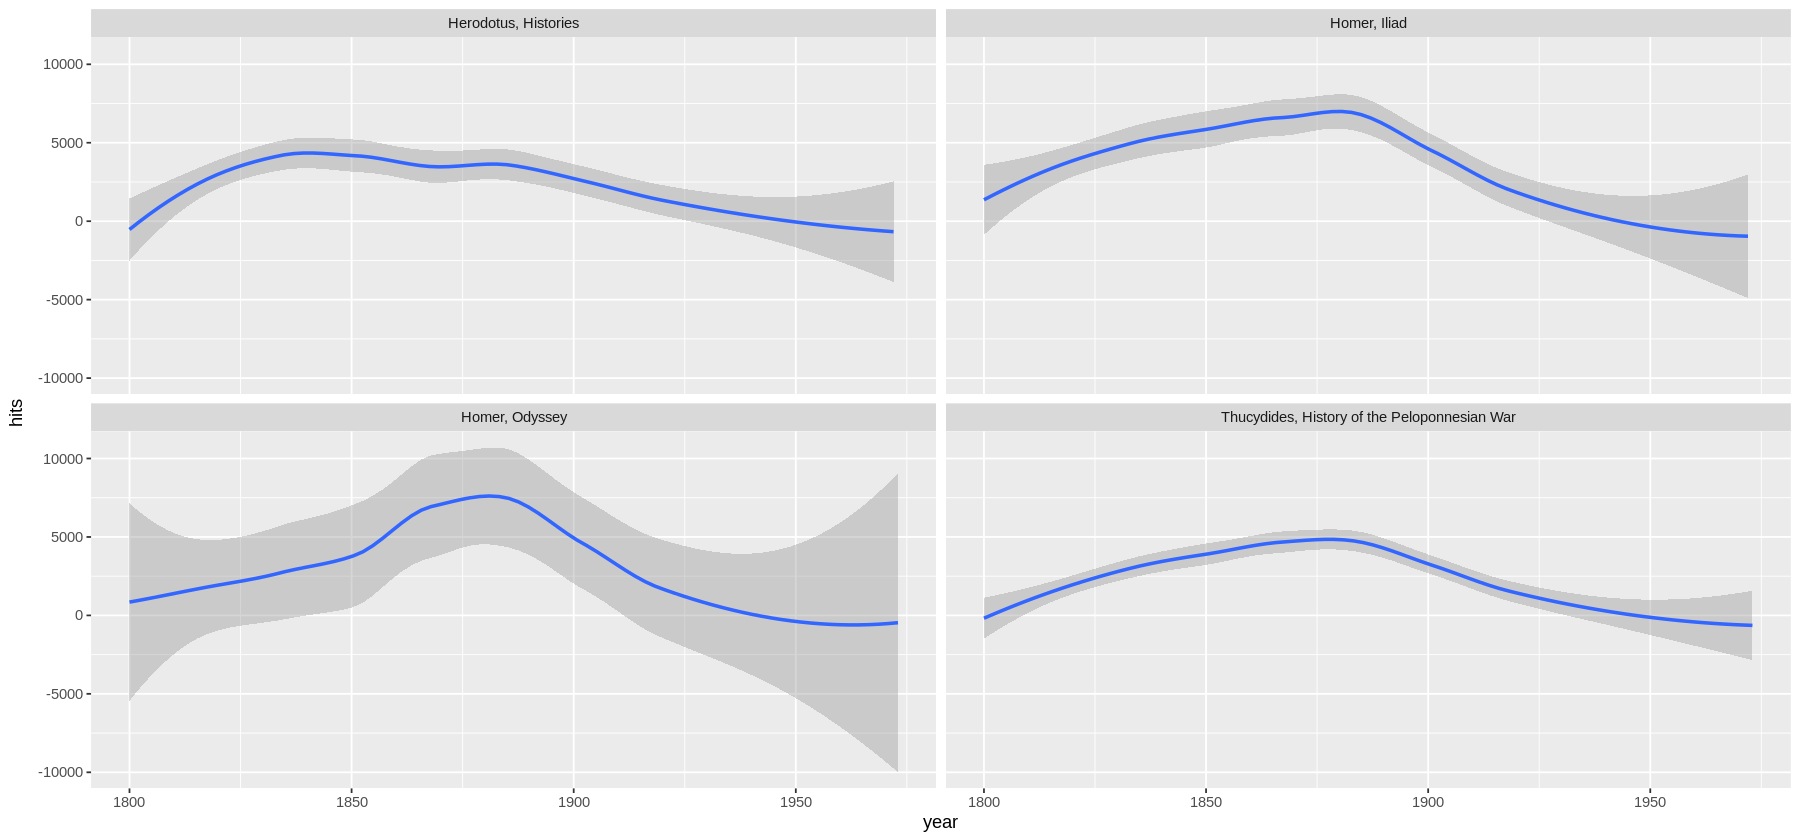

In [19]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(year, hits)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

But are we counting citations the right way? There are just a lot more books in the late 19c, before the copyright cliff. (This plot also shows some outliers that we could use to clean up the IDI metadata.)

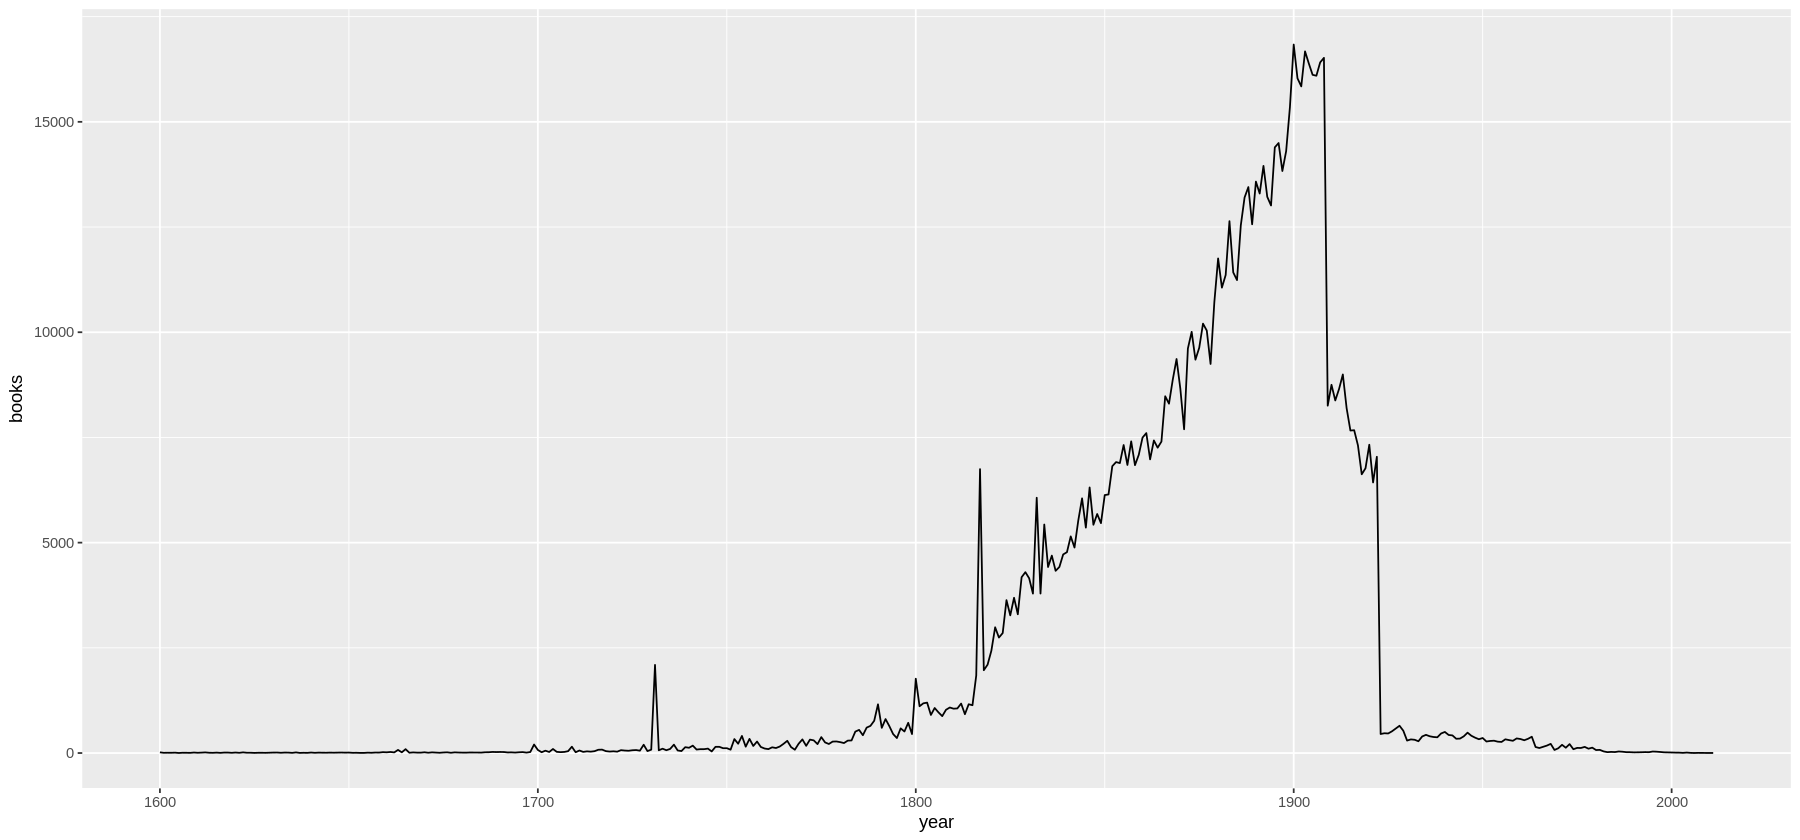

In [20]:
year.books <- idi.dated |> group_by(year) |> summarize(books=n())

year.books |> filter(year >= 1600) |>
  ggplot(aes(year, books)) + geom_line()

If we normalize number of citations by the number of books published in that year, we see that the rates of citation of these works are consistently _falling_ in the later 19c.

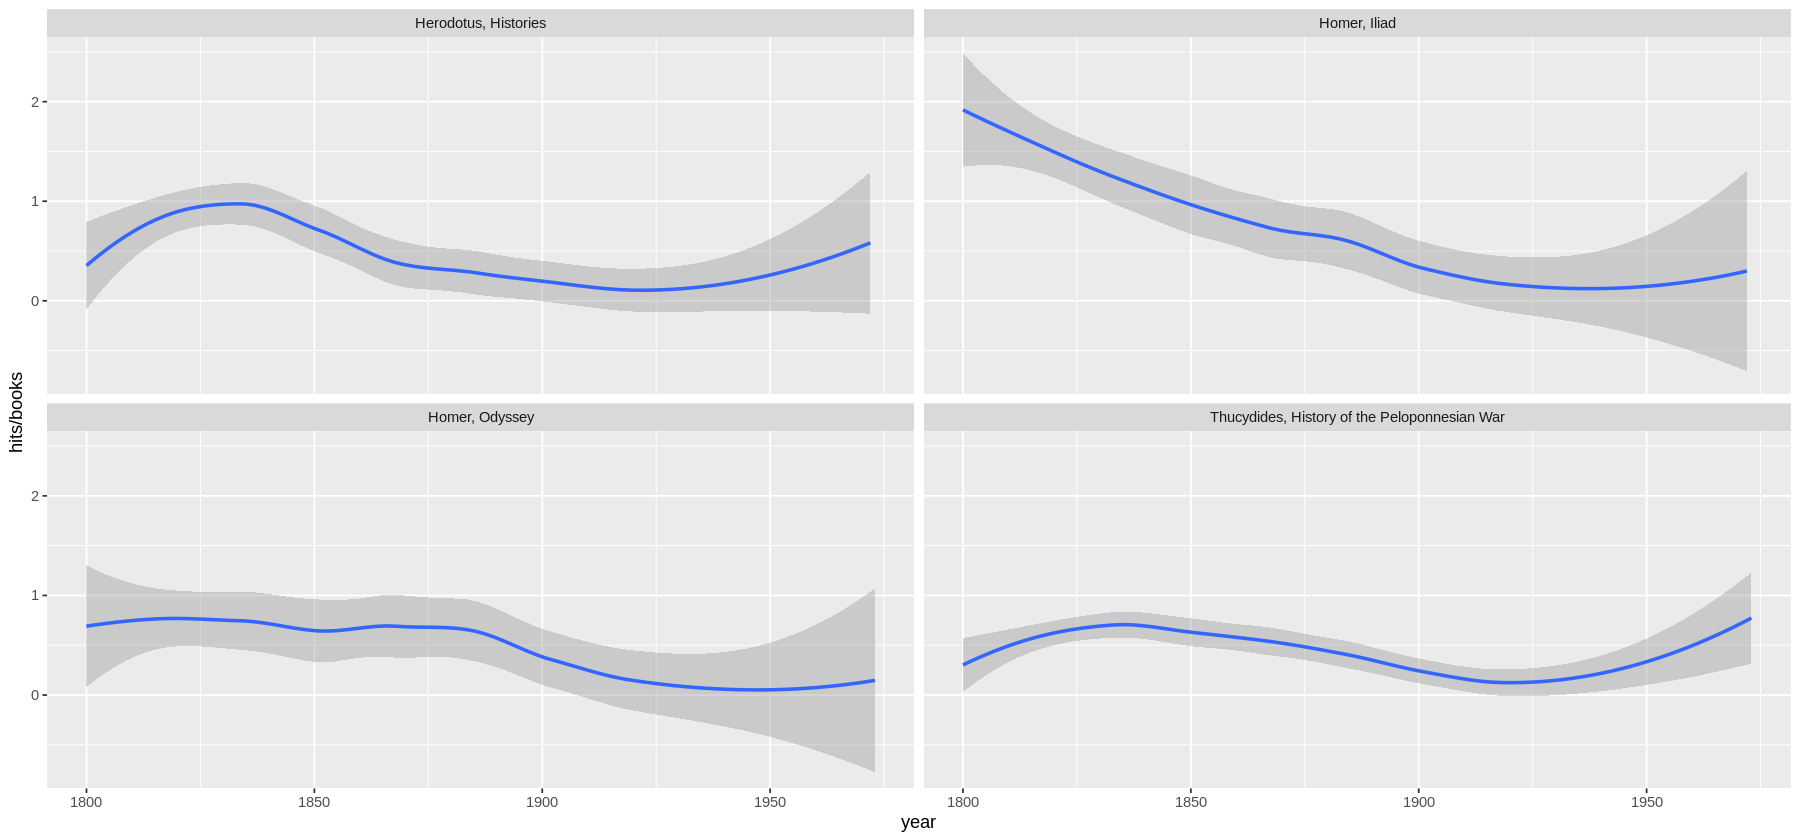

In [21]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

But is it really fair to judge the popularity of Homer by the number of _total_ books? Rather than using book-level metadata, or just the top-level LC classifications we get in IDI, what if we used the presence of Greek and Latin quotations as a proxy for "books that might have mentioned Homer"? We plot the books with quotations, including editions, on top of the total number of books.

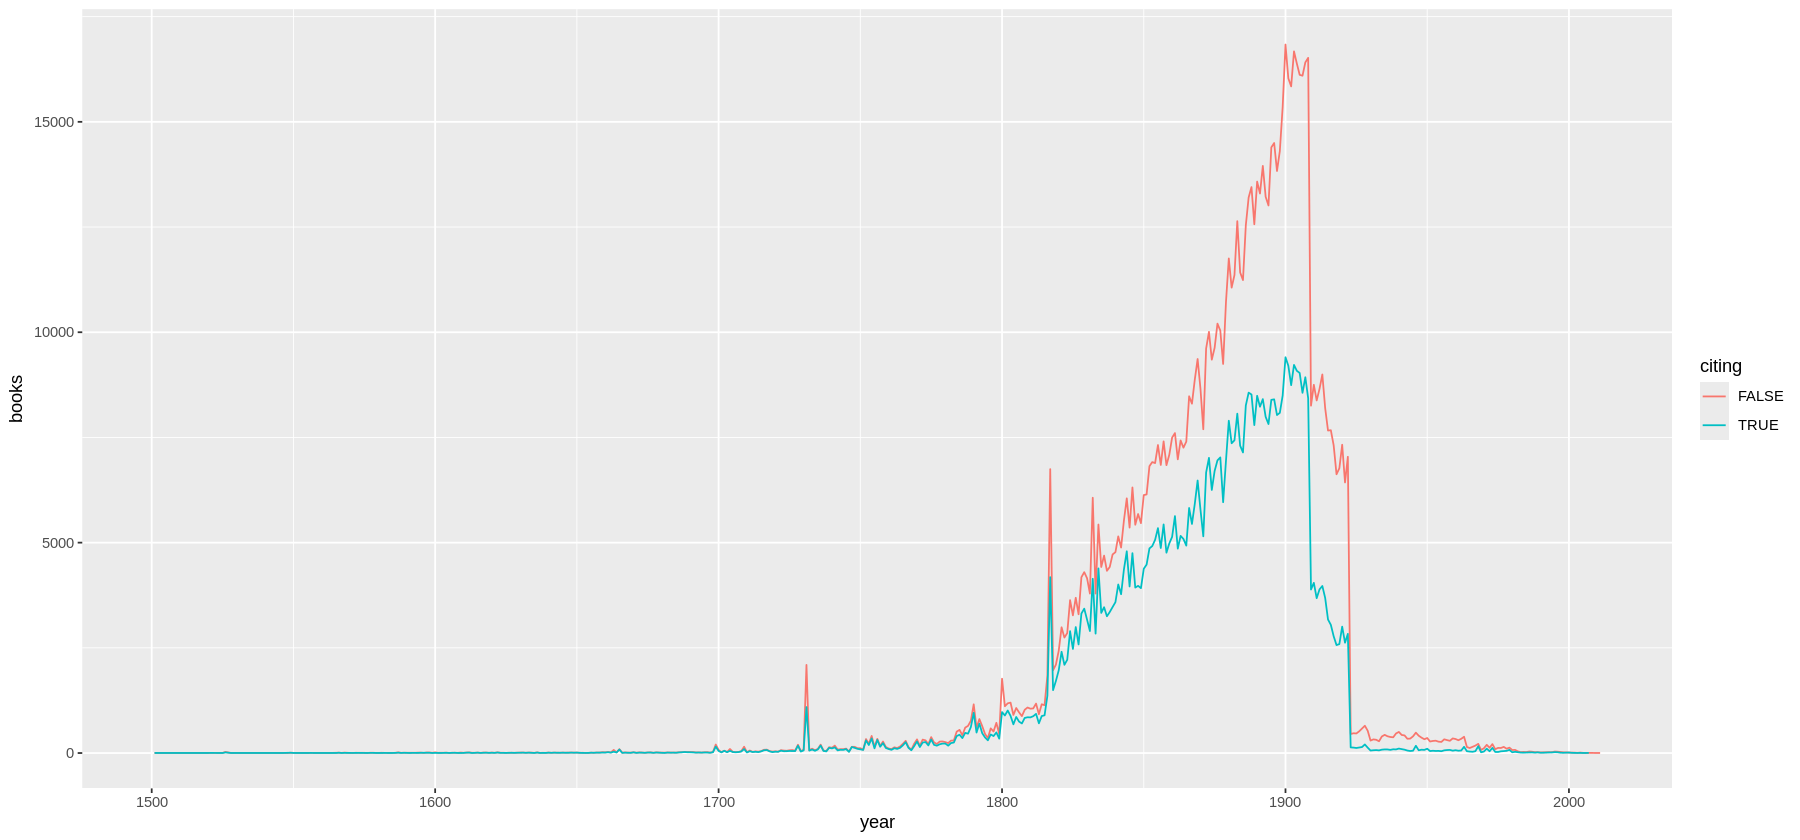

In [22]:
year.cite.books <- meta.cites |> select(year, book) |> distinct() |> group_by(year) |> summarize(books=n())

rbind(year.cite.books %>% mutate(citing=TRUE),
      year.books %>% mutate(citing=FALSE)) |> filter(year >= 1500) |>
  ggplot(aes(year, books, color=citing)) + geom_line()

When we normalize citations by the subset of books, we can see a more decided uptick in interest in Herodotus and Thucydides in the late 19c and early 20c.

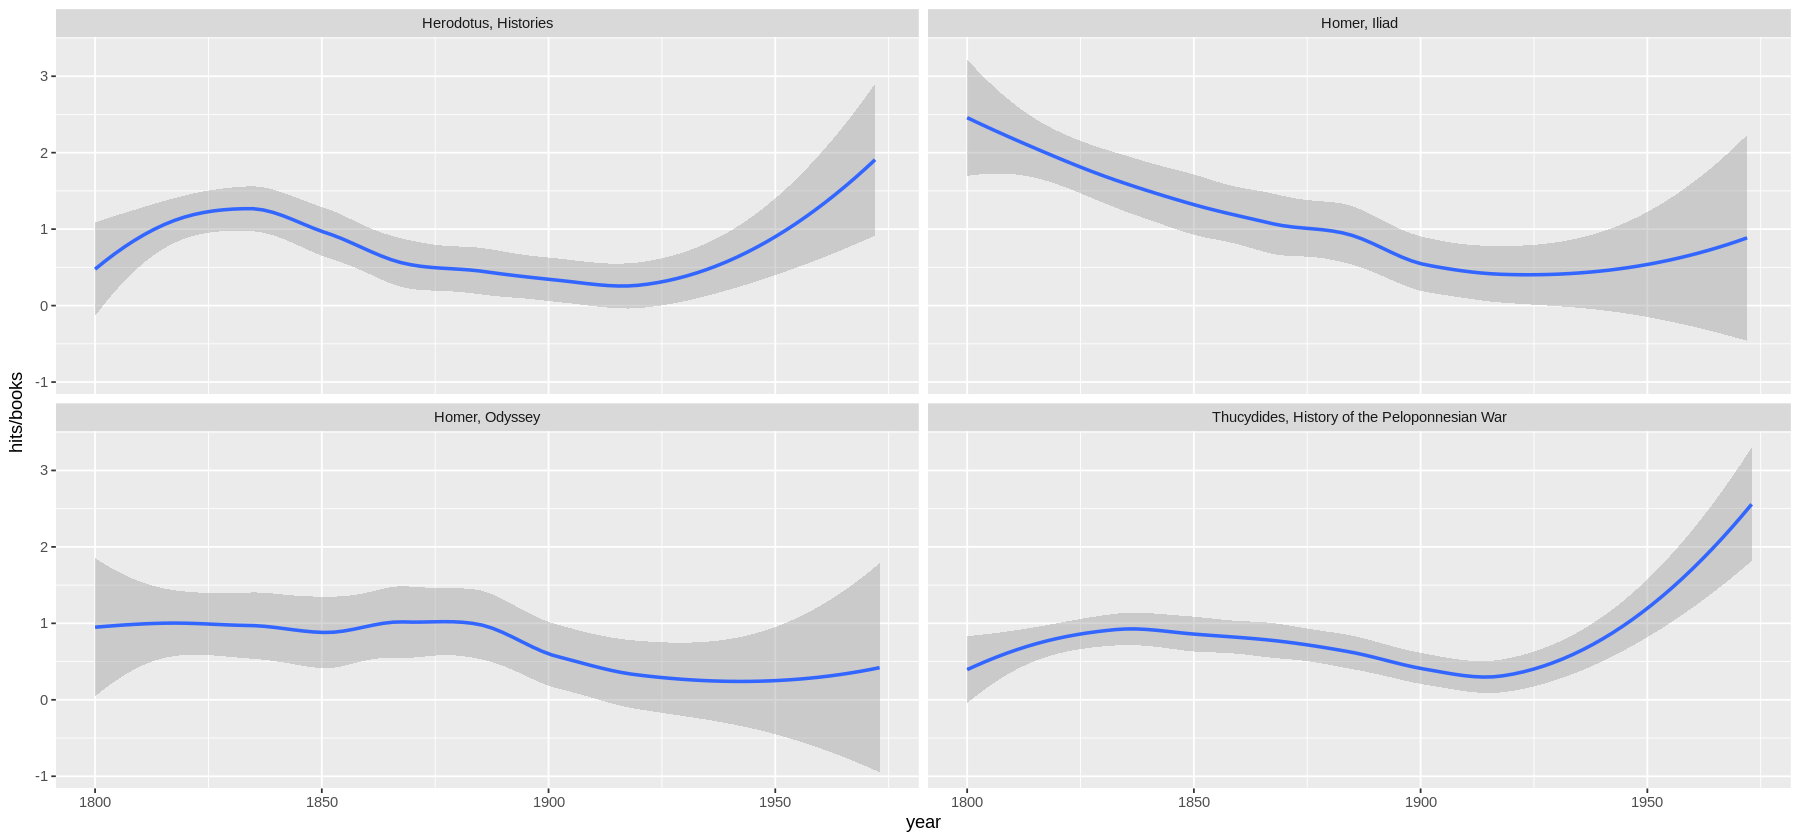

In [23]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  group_by(year, work, work.label) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

If we plot these by the IDI-detected language of these books, we can get a rough idea of the decline of scholarship in Latin.

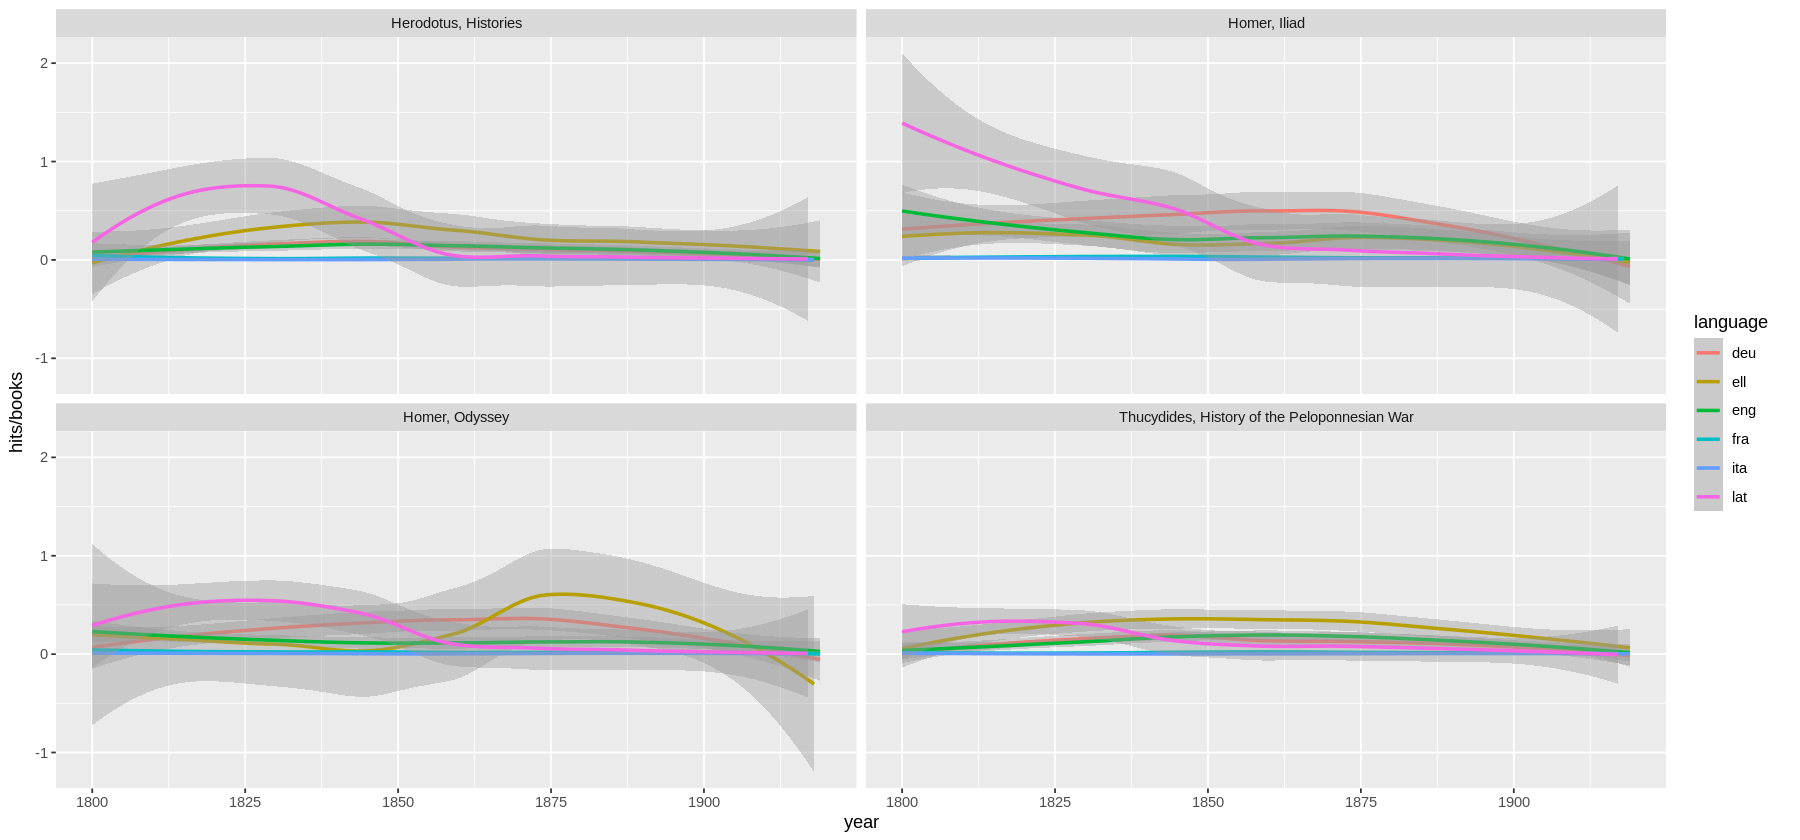

In [24]:
meta.cites |>
  filter(year >= 1800 & year < 1920) |>
  filter(!is.edition & str_detect(work, "^urn:cts:greekLit:tlg(0003|0016|0012)\\.tlg00[12]")) |>
  filter(language %in% alist(ell, lat, deu, eng, fra, ita)) |>
  group_by(year, work, work.label, language) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books, color=language)) + geom_smooth(method="loess", formula=y ~ x) + facet_wrap(vars(work.label))

In [25]:
seq <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/seq.csv.gz")))),
  header=TRUE)

We'll plot the data from Thucydides, binned by 50-year periods.

In [26]:
thuc <- read.csv(textConnection(readLines(gzcon(url("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/locs/urn%3Acts%3AgreekLit%3Atlg0003.tlg001.csv.gz")))),
  header=TRUE)

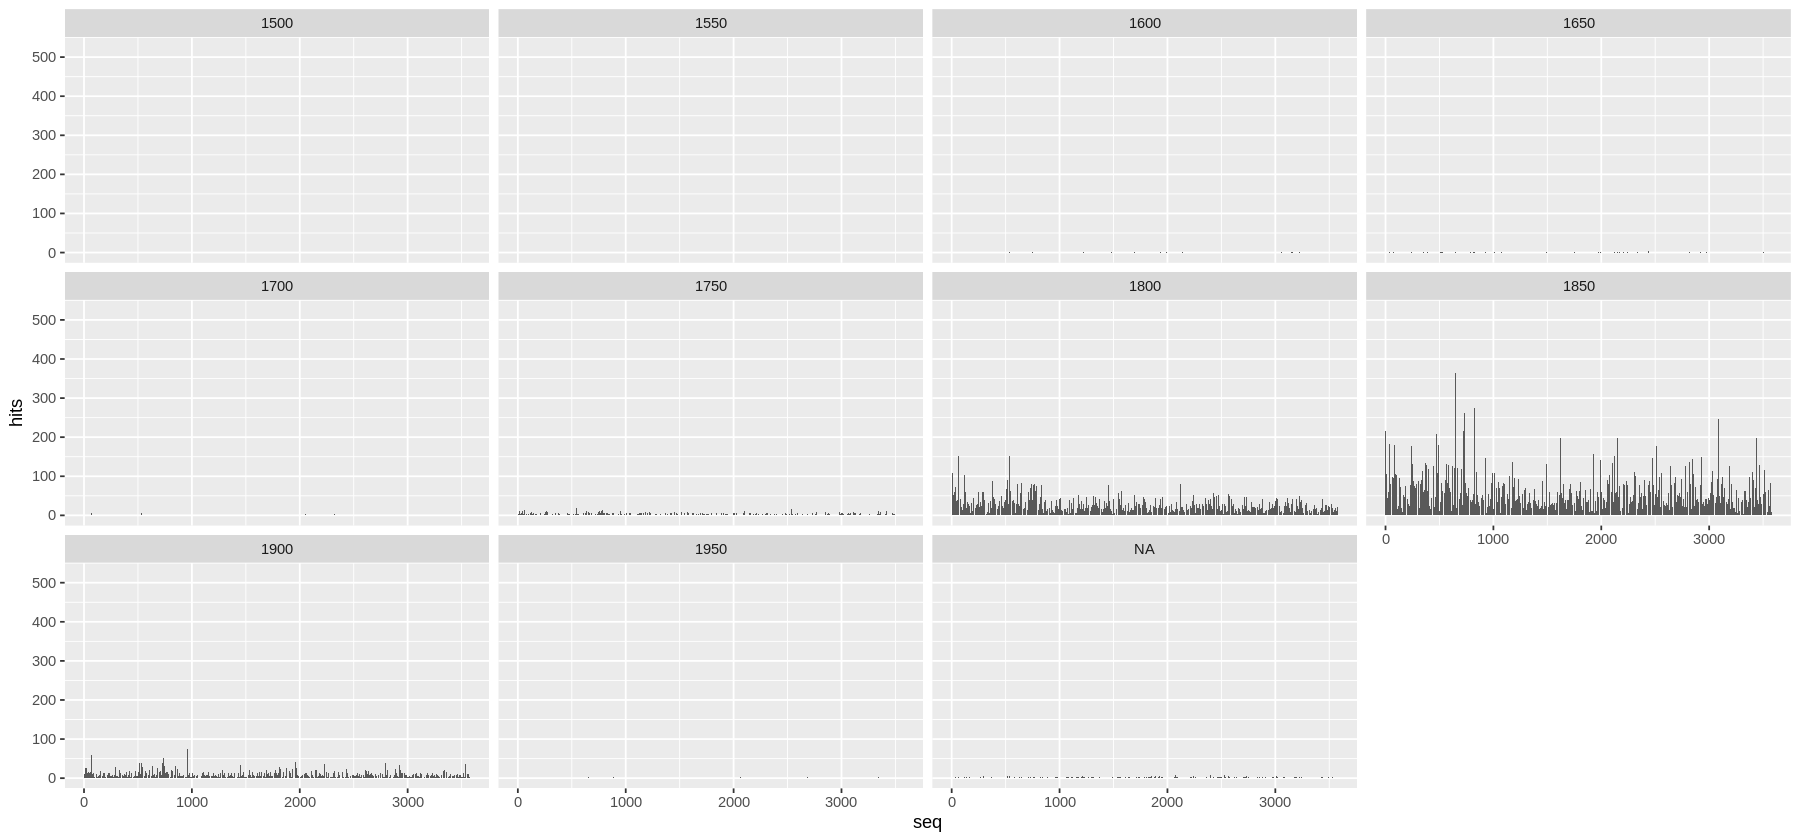

In [27]:
thuc |> inner_join(select(idi.dated, book, year, language=language_gen), by="book") |>
  anti_join(select(thuc.eds, book), by="book") |>
  mutate(bin=as.integer(year/50)*50) |>
  group_by(seq, bin) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(seq, hits)) + geom_col() + facet_wrap(vars(bin))

We join with the `seq` table to get the readable citations and see which ones are most quoted.

In [28]:
thuc |> inner_join(select(idi.dated, book, year, language=language_gen), by="book") |>
  anti_join(select(thuc.eds, book), by="book") |>
  inner_join(filter(seq, startsWith(loc, "urn:cts:greekLit:tlg0003.tlg001")), by="seq") |>
  group_by(loc) |> summarize(hits=sum(hits), .groups="drop") |> arrange(-hits)

loc,hits
<chr>,<int>
urn:cts:greekLit:tlg0003.tlg001:1.126.11,871
urn:cts:greekLit:tlg0003.tlg001:1.6.3,689
urn:cts:greekLit:tlg0003.tlg001:1.22.4,636
urn:cts:greekLit:tlg0003.tlg001:8.68.1,589
urn:cts:greekLit:tlg0003.tlg001:1.4.1,566
urn:cts:greekLit:tlg0003.tlg001:1.138.3,564
urn:cts:greekLit:tlg0003.tlg001:2.15.4,553
urn:cts:greekLit:tlg0003.tlg001:1.90.3,547
urn:cts:greekLit:tlg0003.tlg001:5.16.1,533


We now look at total classics publication.

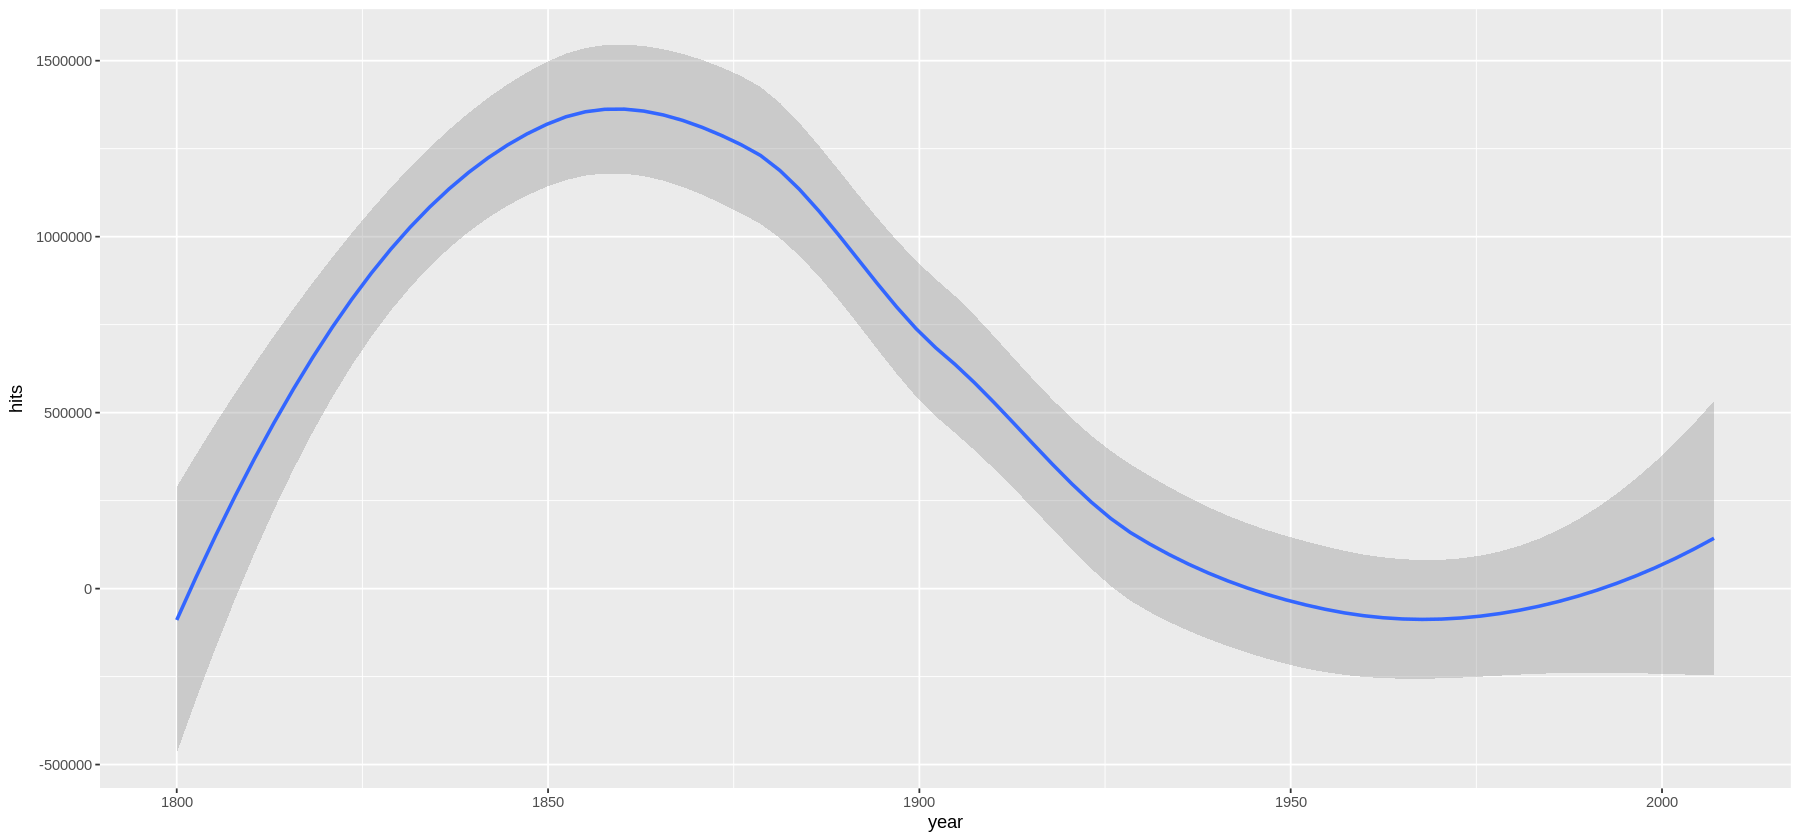

In [29]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  ggplot(aes(year, hits)) + geom_smooth(method="loess", formula=y ~ x)

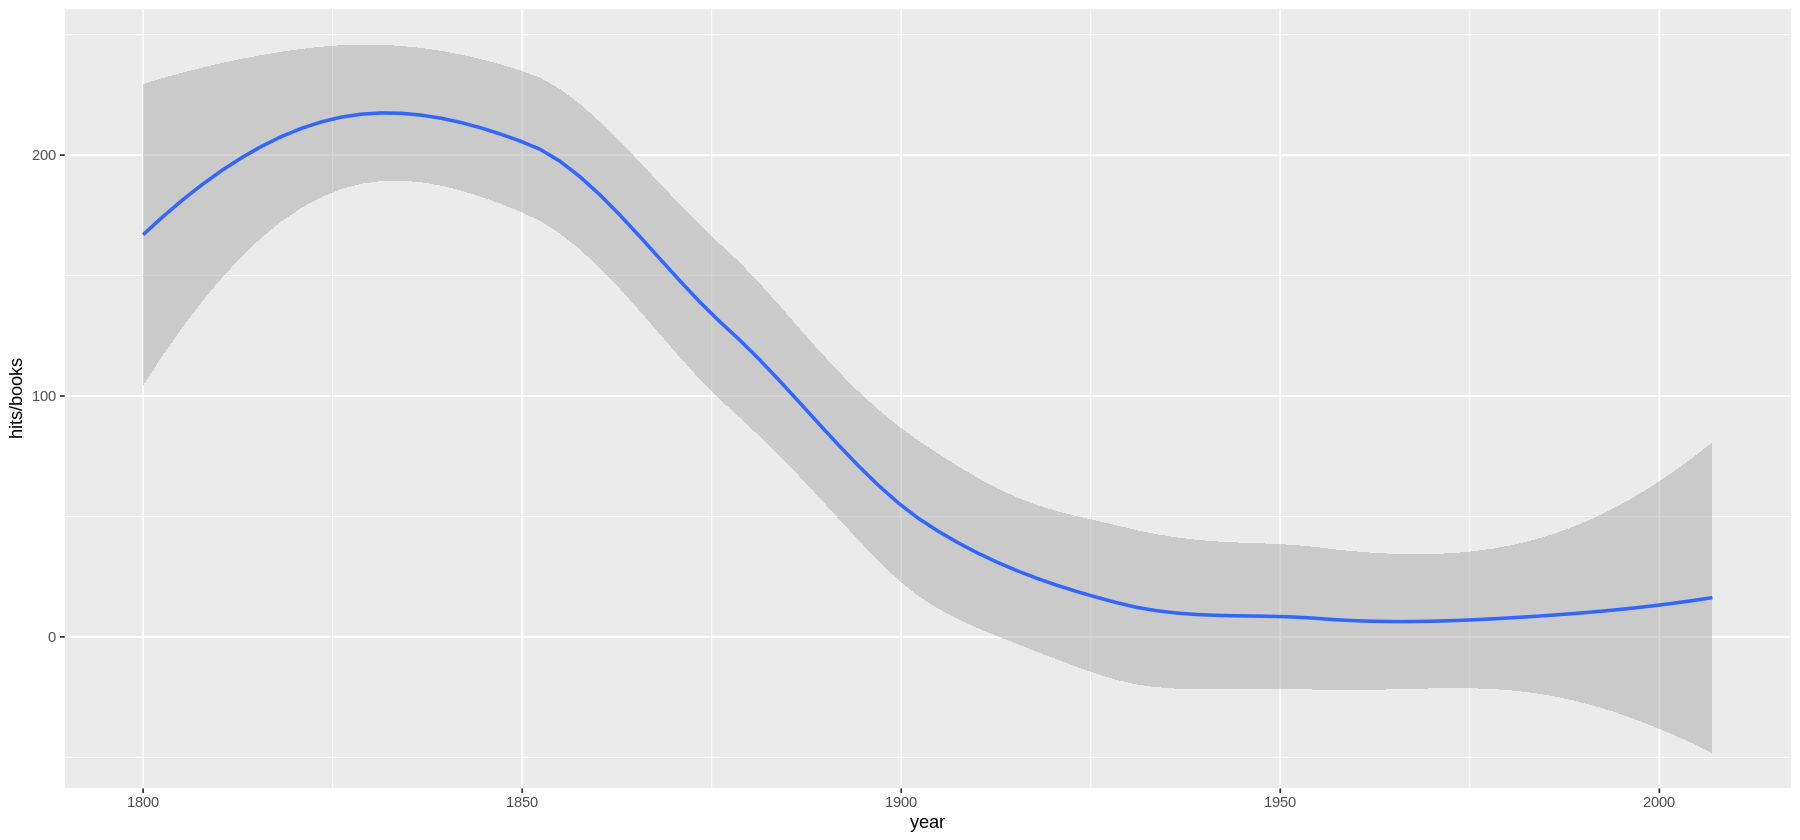

In [30]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x)

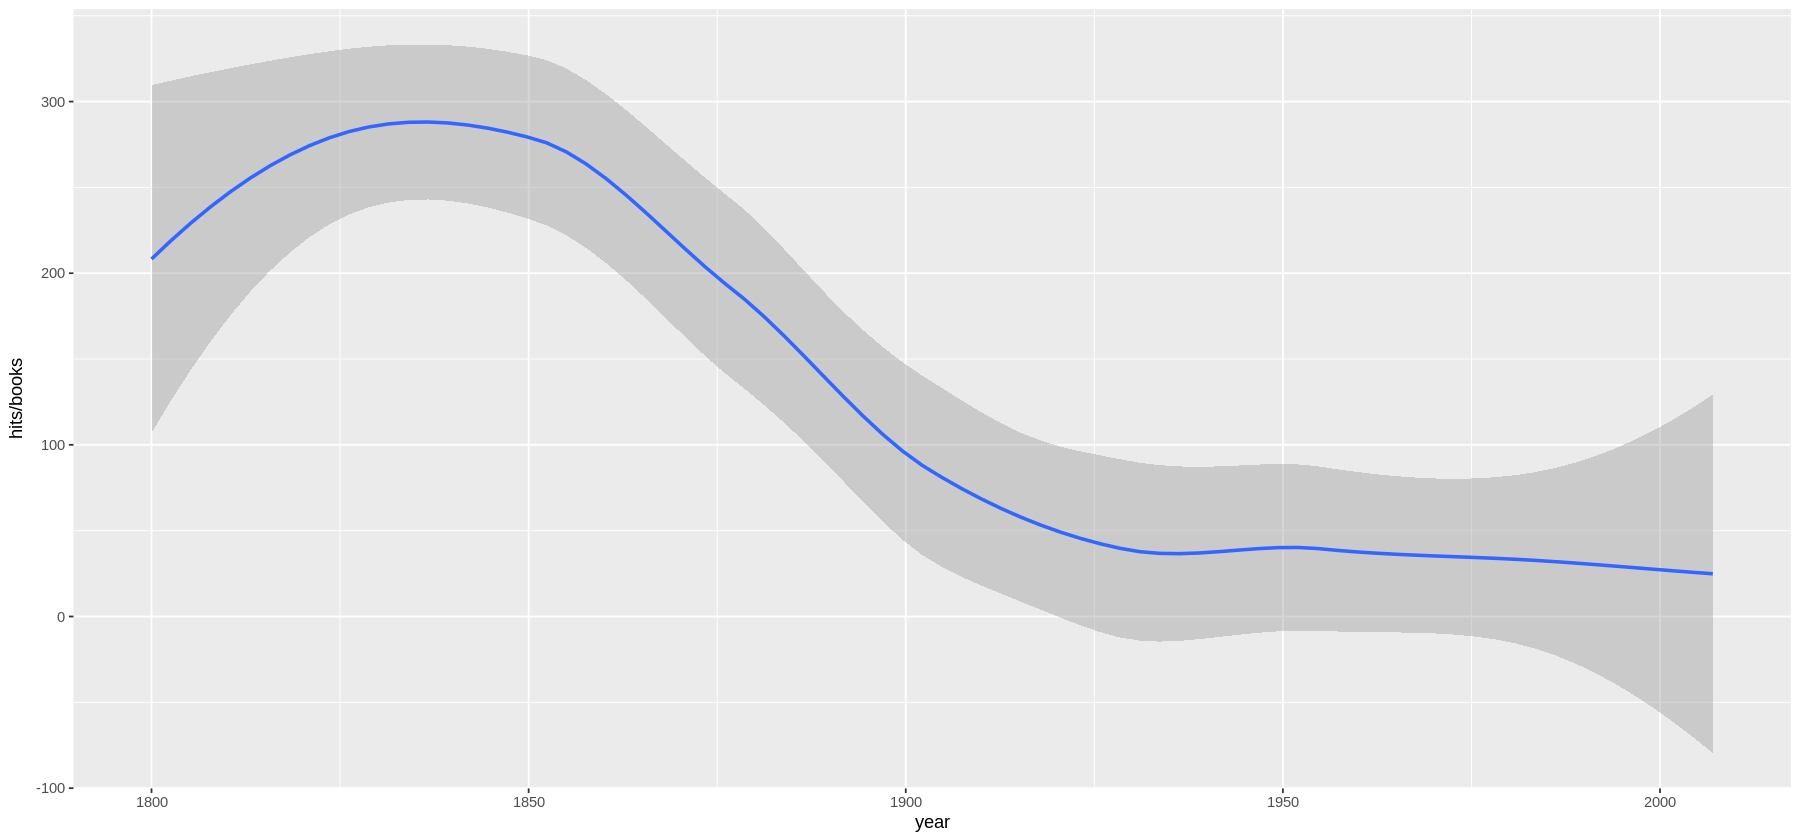

In [31]:
meta.cites |>
  filter(year >= 1800) |>
  filter(!is.edition) |>
  group_by(year) |> summarize(hits=sum(hits), .groups="drop") |>
  inner_join(year.cite.books, by="year") |>
  ggplot(aes(year, hits/books)) + geom_smooth(method="loess", formula=y ~ x)

Editions as a proportion of books

In [32]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  arrange(-editions)

year,editions
<int>,<int>
1857,385
1844,353
1828,300
1875,297
1898,263
1886,258
1891,258
1893,250
1880,246


Warning message:
“Removed 25 rows containing missing values or values outside the scale range
(`geom_smooth()`).”


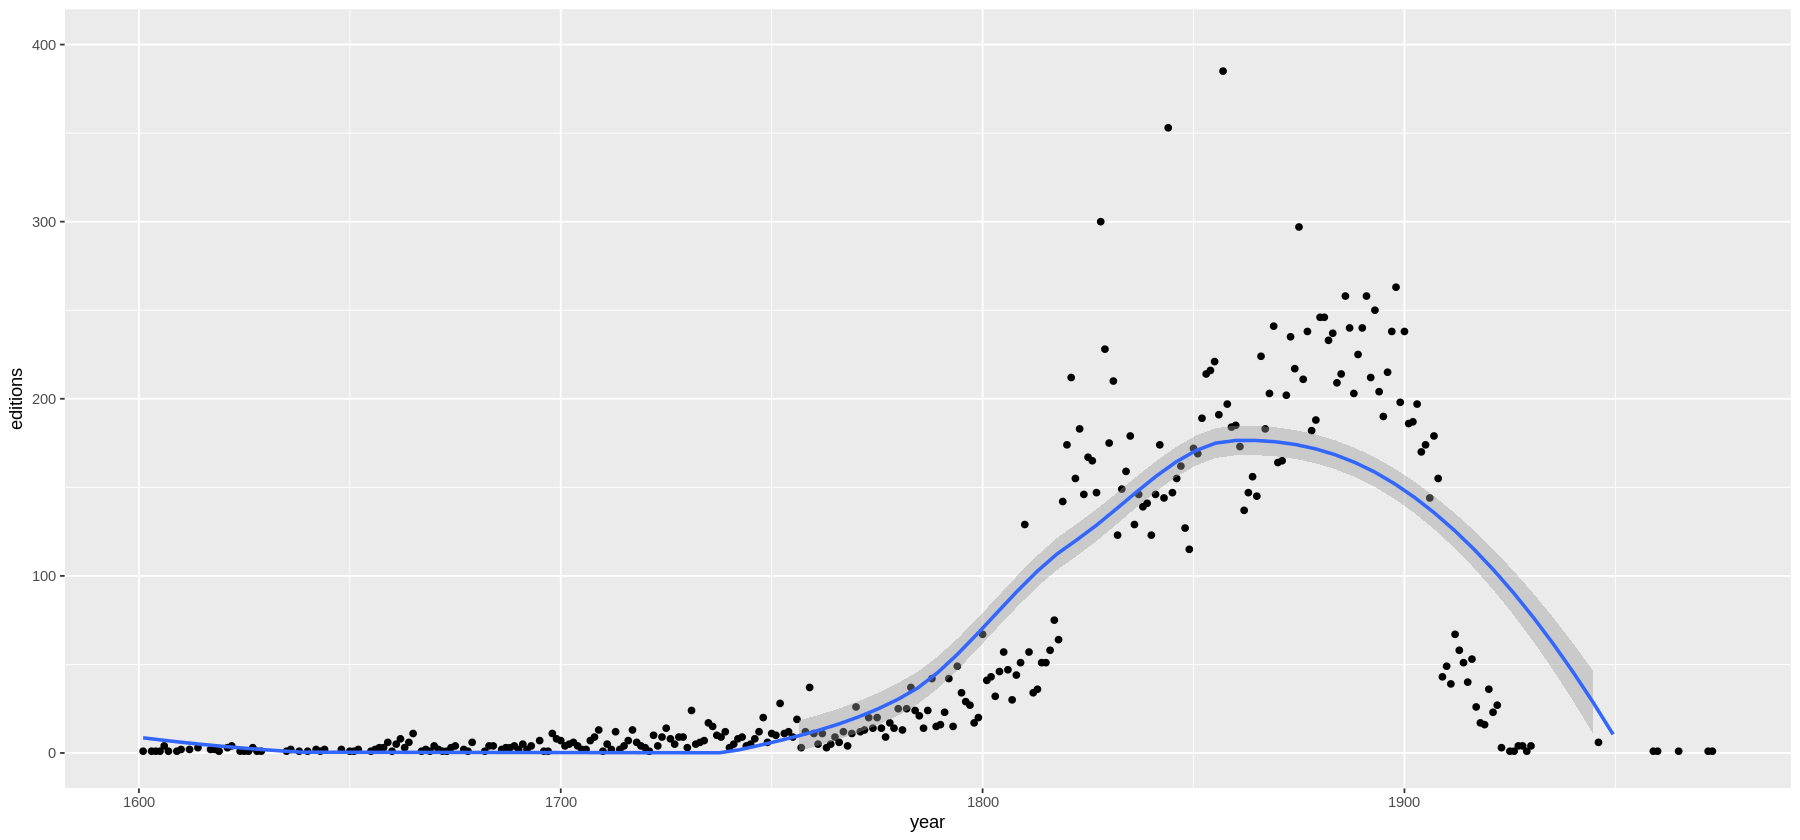

In [33]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, editions)) + geom_point() + geom_smooth(method="loess", formula=y ~ x) + scale_y_continuous(limits=c(0,400))

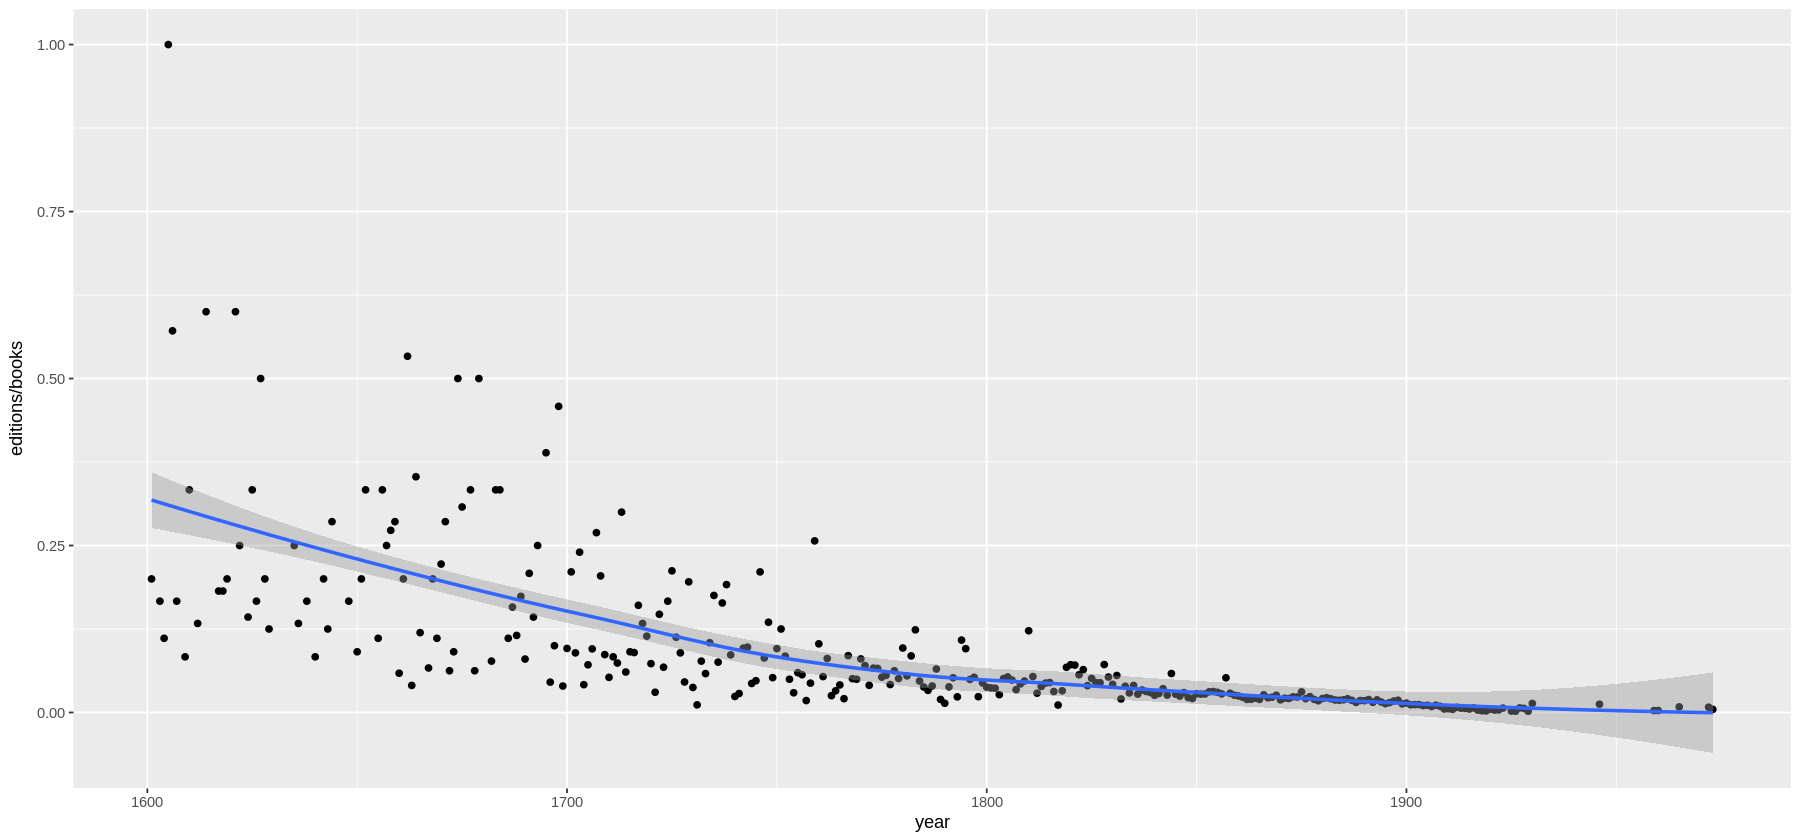

In [34]:
meta.cites |>
  filter(year >= 1600) |>
  filter(is.edition) |>
  select(book, year) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  ggplot(aes(year, editions/books)) + geom_point() + geom_smooth(method="loess", formula=y ~ x)# + scale_y_continuous(limits=c(0,1))

Investigate outliers.

In [35]:
meta.cites |>
  filter(year >= 1700) |>
  filter(is.edition) |>
  select(year, book) |> distinct() |>
  group_by(year) |> summarize(editions=n(), .groups="drop") |>
  inner_join(year.books, by="year") |>
  mutate(prop=editions/books) |>
  arrange(-prop)

year,editions,books,prop
<int>,<int>,<int>,<dbl>
1713,12,40,0.30000000
1707,7,26,0.26923077
1759,37,144,0.25694444
1703,6,25,0.24000000
1725,14,66,0.21212121
1701,4,19,0.21052632
1746,8,38,0.21052632
1708,9,44,0.20454545
1729,9,46,0.19565217


In [36]:
idi.dated |> filter(year == 1713)

book,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen,year,year2
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
32044105319867,Journal literaire.,,1713,uuuu,Continuing resource status unknown,fra,fra,92,78,1713,NA
32044105319875,Journal literaire.,,1713,uuuu,Continuing resource status unknown,fra,fra,91,72,1713,NA
AH631S,"The penitent pardon'd ; or, A discourse of the nature of sin, and the efficacy of repentance, under the parable of the prodigal son","Goodman, John",1713,,Single known date/probable date,eng,eng,93,98,1713,NA
HN79SM,Operum,Ovid,1713,,Single known date/probable date,lat,lat,92,87,1713,NA
HN79SN,Operum,Ovid,1713,,Single known date/probable date,lat,lat,93,87,1713,NA
HXGF81,"Statuts et privileges de la noblesse de la basse Alsace accordes par les anciens empereurs, confirmes et augmentes par le roy = E. frey ohnmittelbaren Ritterschafft im untern Elsass adeliche Ritter-Ordnung und theils kayserliche theils königliche ertheilte, confirmirte und erweiterte privilegia und rescripta.",Holy Roman Empire.,1713,,Single known date/probable date,fra,deu,89,61,1713,NA
32044020446340,"Unum necessarium, scire, quid sibi sit necessarium in vita et morte et post mortem, quod non-necessariis mundi fatigatus et ad unum necessarium sese recipiens,","Comenius, Johann Amos",1713,,Single known date/probable date,lat,lat,91,82,1713,NA
RSMD26,"L'école parfaite des officiers de bouche : qui enseigne les devoirs du maître d'hôtel & du sommelier, la maniere de faire les confitures séches & liquides, les liqueurs, les eaux les pommades & les parfums; la cuisine, à découper les viandes, & à faire la patisserie.",,1713,,Single known date/probable date,fra,fra,94,80,1713,NA
32044086920493,The wife of Bath. A comedy.,"Gay, John",1713,,Single known date/probable date,eng,eng,47,97,1713,NA


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


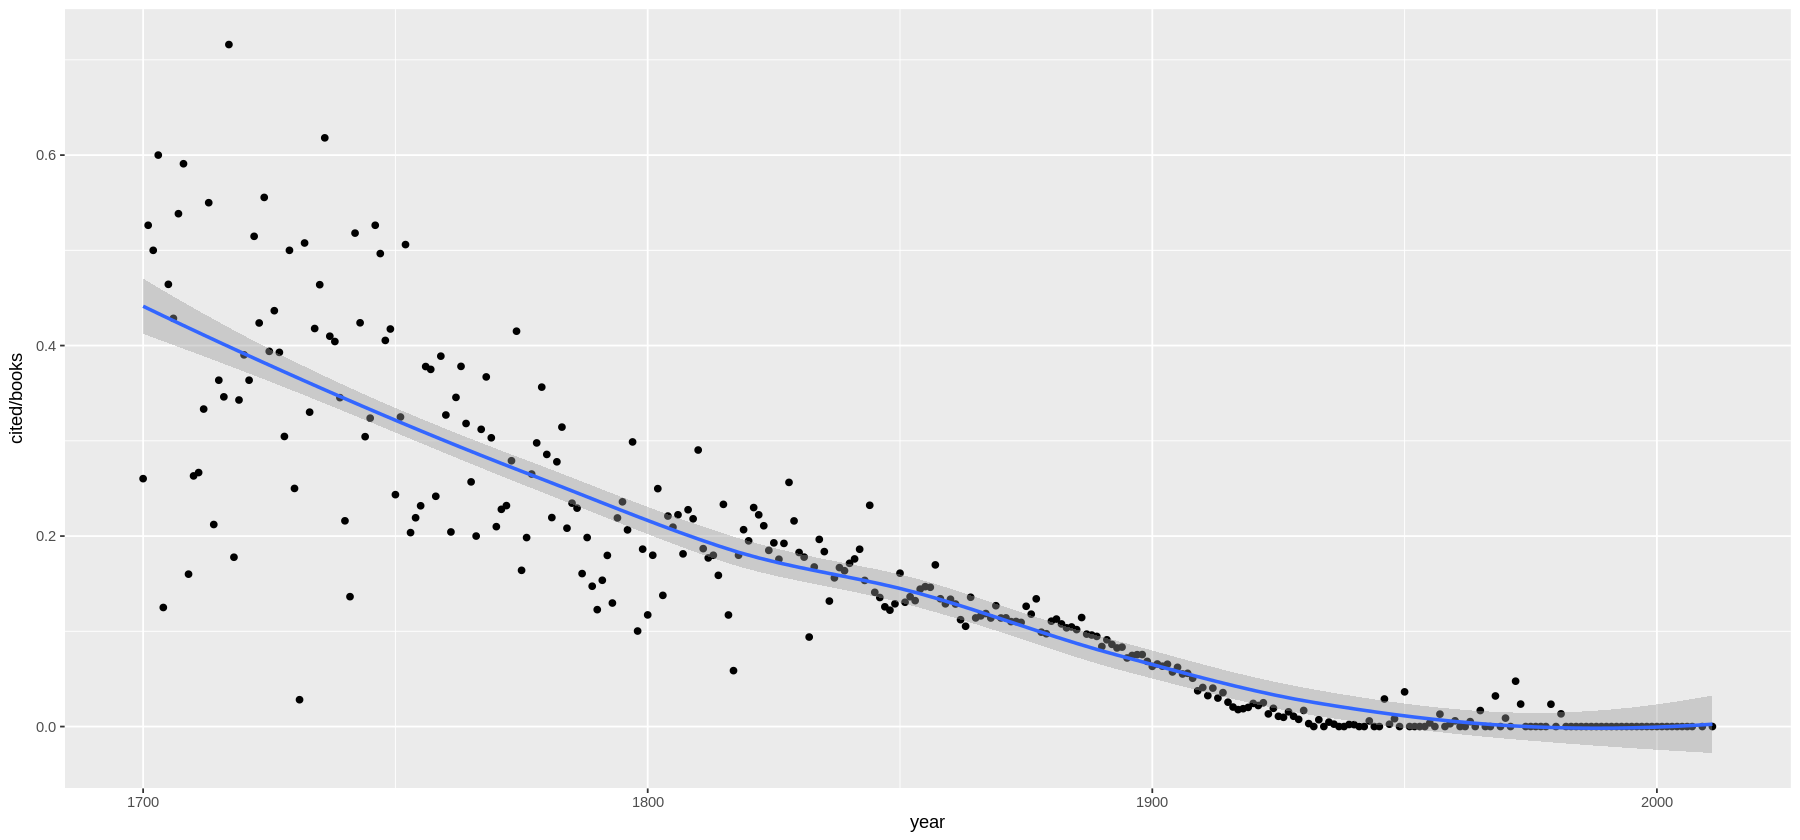

In [37]:
year.books |>
  left_join(meta.cites |> filter(hits >= 10) |> select(year, book) |> distinct() |> group_by(year) |> summarize(cited=n()), by="year") |>
  mutate(cited=if_else(is.na(cited), 0, cited)) |>
  filter(year >= 1700) |>
  ggplot(aes(year, cited/books)) + geom_point() + geom_smooth()

In [38]:
meta.cites |> filter(is.edition) |> count()
meta.cites |> filter(is.edition) |> filter(str_detect(author, fixed(work.author)) | str_detect(title, fixed(work.author))) |> count()
meta.cites |> filter(is.edition) |> filter(str_detect(title, fixed(work.title))) |> count()

  #(str_detect(author, fixed(work.author)) | str_detect(work.author, fixed(author))))

n
<int>
54819


n
<int>
22272


n
<int>
1867


In [39]:
22272/54819

[1] 0.4062825

In [40]:
meta.cites |> filter(is.edition) |>
  rowwise() |> mutate(adist=agrepl(work.author, author), tdist=agrepl(work.author, title)) |>
  ungroup() |> filter(adist | tdist) |> count()

meta.cites |> filter(is.edition) |>
  rowwise() |> mutate(dist=agrepl(work.title, title, max.distance = 0.1)) |>
  ungroup() |> filter(dist) |> count()

n
<int>
23571


n
<int>
3716


In [41]:
overlap |> filter(cover > 0.9 & wover < 0.2) |> mutate(book=tolower(book)) |> arrange(-cover)

edition,book,nlocs,tlen,lcslen,lblcs,wlcs,cover,overlap,wover
<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
urn:cts:greekLit:tlg0059.tlg013.perseus-grc2,hxjfe7,33,78090,33,9444.0,15467.5,1,1.0000000,0.1980727
urn:cts:latinLit:stoa0121g.stoa004.opp-lat1,hnhban,31,194899,17,8352.0,37639.0,1,0.5483871,0.1931205
urn:cts:greekLit:tlg0086.tlg034.1st1K-grc1,32044099889891,26,73974,26,13255.0,14239.0,1,1.0000000,0.1924865
urn:cts:greekLit:tlg0031.tlg017.perseus-grc2,ah629c,46,5519,28,921.0,1048.0,1,0.6086957,0.1898895
urn:cts:greekLit:tlg4102.tlg005.1st1K-grc1,ah5gz5,21,561285,21,34249.0,104535.0,1,1.0000000,0.1862423
urn:cts:greekLit:tlg0031.tlg026.perseus-grc2,hws382,25,3790,14,440.5,682.5,1,0.5600000,0.1800792
urn:cts:greekLit:tlg0540.tlg009.perseus-grc2,32044085139459,22,7063,17,1321.0,1321.0,1,0.7727273,0.1870310
urn:cts:latinLit:stoa0040.stoa001a.opp-lat1,32044077853158,39,175832,39,27569.5,30227.5,1,1.0000000,0.1719113
urn:cts:latinLit:stoa0040.stoa001a.opp-lat1,ah56pa,39,175832,39,26611.0,30032.0,1,1.0000000,0.1707994


Analyze books with a lot of Greek that are not editions.

In [42]:
greek.words <- read.csv("https://raw.githubusercontent.com/dasmiq/idi-cites/refs/heads/main/greek-words.csv", header=TRUE)

In [50]:
book.overlap <- overlap |> group_by(book) |> summarize(cover=max(cover), overlap=max(overlap), wover=max(wover)) |> ungroup()

In [64]:
greek.words |>
  mutate(words.per.line=wc/lc) |>
  left_join(book.overlap, by="book") |>
  inner_join(idi.dated, by="book") |>
  filter(wover < 0.1 & cover < 0.3 & wc >= 1000) |>
  arrange(-wc)


book,lc,wc,words.per.line,cover,overlap,wover,title,author,date1_src,date2_src,date_types_src,language_src,language_gen,ocr_score_src,ocr_score_gen,year,year2
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
32044100438399,121917,684519,5.614631,0.07291667,0.07291667,0.01791569,"Kitabē Moukaddes, yiahod, Achdē atik ile Achdē cedid, yiani, Palaia ve Nea Diathēkē.",,1902,,Single known date/probable date,tur,ell,84,100,1902,NA
HWSRMQ,119929,638447,5.323541,0.09375000,0.09375000,0.02470726,Kitap⁻e moukattes.giachot act⁻e atik ile acht⁻e tzetit.,,1884,,Single known date/probable date,tur,ell,83,100,1884,NA
32044059396499,80181,581640,7.254088,0.29230769,0.27692308,0.02253955,Themis.,,1890,19uu,Continuing resource ceased publication (Dead status),ell,ell,87,100,1890,NA
32044059396507,80451,580755,7.218742,0.19230769,0.18181818,0.02854715,Themis.,,1890,19uu,Continuing resource ceased publication (Dead status),ell,ell,87,100,1890,NA
32044057034605,79290,550833,6.947068,0.27272727,0.22727273,0.04714695,Kōdix Themidos.,Greece.,1891,1955,Multiple dates,ell,ell,87,100,1891,1955
32044092925270,75047,531190,7.078098,0.18181818,0.18181818,0.01643147,"Ho Noumas [Ephēmeris politikē, koinōnikē, philologikē]",,1903,uuuu,Continuing resource status unknown,ell,ell,88,100,1903,NA
32044059396465,70567,530674,7.520144,0.19047619,0.14285714,0.02193420,Themis.,,1890,19uu,Continuing resource ceased publication (Dead status),ell,ell,87,100,1890,NA
32044083475665,72939,515618,7.069167,0.09090909,0.09090909,0.02186115,"Ho Noumas [Ephēmeris politikē, koinōnikē, philologikē]",,1903,uuuu,Continuing resource status unknown,ell,ell,88,100,1903,NA
32044098648900,75663,514956,6.805916,0.24390244,0.24390244,0.02611009,Panathēnaia: dekapenthēmeron eikonographēmenon periodikon.,,1900,uuuu,Continuing resource status unknown,ell,ell,86,100,1900,NA


In [44]:
meta.cites |> filter(!is.edition) |>
  group_by(work, work.author, work.title, words) |> summarize(hits=sum(hits)) |> ungroup() |>
  mutate(rate=hits/words) |> select(work.author, work.title, rate) |> arrange(-rate) |> head(40)

`summarise()` has grouped output by 'work', 'work.author', 'work.title'. You
can override using the `.groups` argument.


work.author,work.title,rate
<chr>,<chr>,<dbl>
Horace,Odes,42.16378
Liber Enoch,Apocalypsis Enochi,41.67863
Horace,Ars Poetica,32.44628
Virgil,Eclogues,28.71676
Horace,Carmen Saeculare,28.12258
Horace,Epistulae,27.02038
Virgil,Georgics,24.09852
"Nepos, Cornelius",Aristides,23.17579
Horace,Satires,22.51196
